<a href="https://colab.research.google.com/github/aliebi/type_classification/blob/main/task_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Feb 20 11:21:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install torch torchvision
!pip install transformers
!pip install pandas
!pip install numpy

     |████████████████████████████████| 1.8MB 18.7MB/s 
     |████████████████████████████████| 3.2MB 56.5MB/s 
     |████████████████████████████████| 890kB 54.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=25f2ccd2c9904c3d3decb9bcba496886b2062c0a570e94fb83aba6eeb79e976c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
cd /content/drive/MyDrive/task_classification

/content/drive/MyDrive/task_classification


In [4]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DFGN/train_select/paragraph_train_final.csv')
dev = pd.read_csv('/content/drive/MyDrive/DFGN/train_select/paragraph_dev_final.csv')

train = train.drop(['Unnamed: 0','Unnamed: 0.1'],axis = 1)
dev = dev.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis = 1)

In [14]:
train.head(50)

,answer,context,question
0,1,Arthur's Magazine (1844–1846) was an American ...,Which magazine was started first Arthur's Maga...
1,1,The Oberoi family is an Indian family that is ...,The Oberoi family is part of a hotel company t...
2,1,"Allison Beth ""Allie"" Goertz (born March 2, 199...",Musician and satirist Allie Goertz wrote a son...
3,1,James Henry Miller (25 January 1915 – 22 Octob...,What nationality was James Henry Miller's wife?
4,1,Cadmium chloride is a white crystalline compou...,Cadmium Chloride is slightly soluble in this c...
5,1,Henri Leconte (born 4 July 1963) is a former F...,Which tennis player won more Grand Slam titles...
6,1,"India, officially the Republic of India (""Bhār...",Which genus of moth in the world's seventh-lar...
7,1,Badr Hari (Arabic: بدر هاري‎ ‎ ; born 8 Decemb...,Who was once considered the best kick boxer in...
8,1,House of Anubis is a mystery television series...,"The Dutch-Belgian television series that ""Hous..."
9,1,Mount Panorama Circuit is a motor racing track...,What is the length of the track where the 2013...


In [5]:
def change_dataset(dataset1):
    list_of_rows = []
    for i in range(0, len(dataset1), 2):
        dictionary = {}

        # dictionary['question'] = dataset1.loc[i, 'question']
        if dataset1.loc[i, 'answer'] == 'yes'  or dataset1.loc[i, 'answer'] == 'no':
          dictionary['answer'] = 0
        else:
          dictionary['answer'] = 1
          
        dictionary['context'] = dataset1.loc[i, 'context']+" " + dataset1.loc[i + 1, 'context']
        dictionary['question'] = dataset1.loc[i, 'question']


        list_of_rows.append(dictionary)

    return pd.DataFrame(list_of_rows)


train = change_dataset(train)
dev = change_dataset(dev)

In [12]:
train.head(5)

,answer,context,question
0,1,Arthur's Magazine (1844–1846) was an American ...,Which magazine was started first Arthur's Maga...
1,1,The Oberoi family is an Indian family that is ...,The Oberoi family is part of a hotel company t...
2,1,"Allison Beth ""Allie"" Goertz (born March 2, 199...",Musician and satirist Allie Goertz wrote a son...
3,1,James Henry Miller (25 January 1915 – 22 Octob...,What nationality was James Henry Miller's wife?
4,1,Cadmium chloride is a white crystalline compou...,Cadmium Chloride is slightly soluble in this c...


In [6]:
length = 0

for i,j in train.iterrows():
  l = len(str(j['question']).split())
  if l > length : length = l

# print(length)  max length =  108


In [7]:
import random
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set seeds for reproducibility
random.seed(26)
np.random.seed(26)
torch.manual_seed(26)

tokenizer = AutoTokenizer.from_pretrained("roberta-large") 
# google/electra-large-discriminator


model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/task_classification/task_class0")
model.to(device) # Send the model to the GPU if we have one

learning_rate = 1e-5
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

In [16]:
def encode_data(tokenizer, questions, passages, max_length):
    """Encode the question/passage pairs into features than can be fed to the model."""
    input_ids = []
    attention_masks = []

    for question, passage in zip(questions, passages):
        encoded_data = tokenizer.encode_plus(question, max_length=max_length, pad_to_max_length=True, truncation_strategy="longest_first")
        encoded_pair = encoded_data["input_ids"]
        attention_mask = encoded_data["attention_mask"]

        input_ids.append(encoded_pair)
        attention_masks.append(attention_mask)

    return np.array(input_ids), np.array(attention_masks)

# Loading data

passages_train = train.context.values
questions_train = train.question.values
answers_train = train.answer.values.astype(int)

passages_dev = dev.context.values
questions_dev = dev.question.values
answers_dev = dev.answer.values.astype(int)

# Encoding data
max_seq_length = 128
input_ids_train, attention_masks_train = encode_data(tokenizer, questions_train, passages_train, max_seq_length)
input_ids_dev, attention_masks_dev = encode_data(tokenizer, questions_dev, passages_dev, max_seq_length)

train_features = (input_ids_train, attention_masks_train, answers_train)
dev_features = (input_ids_dev, attention_masks_dev, answers_dev)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [17]:
# Building Dataloaders
batch_size = 2

train_features_tensors = [torch.tensor(feature, dtype=torch.long) for feature in train_features]
dev_features_tensors = [torch.tensor(feature, dtype=torch.long) for feature in dev_features]

train_dataset = TensorDataset(*train_features_tensors)
dev_dataset = TensorDataset(*dev_features_tensors)

train_sampler = RandomSampler(train_dataset)
dev_sampler = SequentialSampler(dev_dataset)

train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)
dev_dataloader = DataLoader(dev_dataset, sampler=dev_sampler, batch_size=batch_size)

In [18]:
epochs = 1
grad_acc_steps = 4
train_loss_values = []
dev_acc_values = []

cnt = 1
for _ in tqdm(range(epochs), desc="Epoch"):

  # Training
  epoch_train_loss = 0 # Cumulative loss
  model.train()
  model.zero_grad()

  for step, batch in tqdm(enumerate(train_dataloader)):

      input_ids = batch[0].to(device)
      attention_masks = batch[1].to(device)
      labels = batch[2].to(device)     

      outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks, labels=labels)

      loss = outputs[0]
      loss = loss / grad_acc_steps
      epoch_train_loss += loss.item()

      loss.backward()
      
      if (step+1) % grad_acc_steps == 0: # Gradient accumulation is over
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # Clipping gradients
        optimizer.step()
        model.zero_grad()

  epoch_train_loss = epoch_train_loss / len(train_dataloader)          
  train_loss_values.append(epoch_train_loss)
  
  # Evaluation
  epoch_dev_accuracy = 0 # Cumulative accuracy
  model.save_pretrained("/content/drive/MyDrive/task_classification/task_class{}".format(cnt))
  cnt +=1
  model.eval()

  for batch in dev_dataloader:
    
    input_ids = batch[0].to(device)
    attention_masks = batch[1].to(device)
    labels = batch[2]
                
    with torch.no_grad():        
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_masks)
                    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    
    predictions = np.argmax(logits, axis=1).flatten()
    labels = labels.numpy().flatten()
    
    epoch_dev_accuracy += np.sum(predictions == labels) / len(labels)

  epoch_dev_accuracy = epoch_dev_accuracy / len(dev_dataloader)
  dev_acc_values.append(epoch_dev_accuracy)

Epoch: 100%|██████████| 1/1 [03:01<00:00, 181.88s/it]


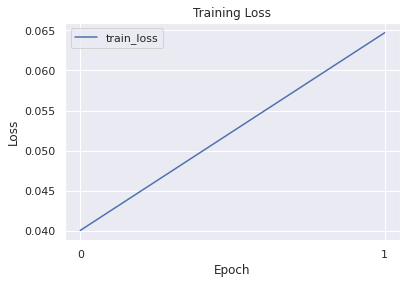

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.plot(train_loss_values, label="train_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.xticks(np.arange(0, 2))
plt.show()

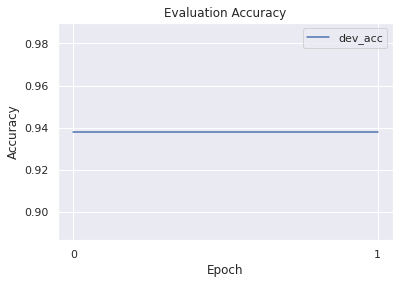

In [13]:

plt.plot(dev_acc_values, label="dev_acc")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evaluation Accuracy")
plt.legend()
plt.xticks(np.arange(0, 2))
plt.show()

In [21]:
print(dev_acc_values)

[0.9968777094923217]
